In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
%%sh
./run.sh

Experiment date and time: Mon May 22 04:36:26 PM PDT 2023
Number of branches: 
509007786
Number of mispredictions: 
5140540


In [9]:
def clean_df(df):
    df = df.fillna(-1)
    df = df.replace(r'[^0-9]+',-1)
    df = df.replace('',-1)
    df = df.replace(' ',-1)
    df = df.replace('\n',-1)
    return df

In [10]:
data = pd.read_csv("results.csv", delim_whitespace=True) 
data = clean_df(data)

data["BrRetired"] = pd.to_numeric(data["BrRetired"],errors='coerce')
data["BrMispInd"] = pd.to_numeric(data["BrMispInd"],errors='coerce')

data["BrMispInd"] = data["BrMispInd"] / 1000
data["BrRetired"] = (data["BrRetired"] - 3000) / 1000

In [11]:
data

,Clock,BrRetired,BrMisAll,BrIndir,BrMispInd
0,36392778,202.004,2022,31,0.514
1,36577118,202.004,1982,0,0.492
2,36406873,202.004,2072,0,0.525
3,36409946,202.003,1994,0,0.483
4,36399496,202.004,2006,0,0.505
...,...,...,...,...,...
1995,37317859,301.003,2614,0,0.412
1996,37400860,301.004,2597,0,0.415
1997,37398170,301.004,2588,0,0.423
1998,37342799,301.004,2646,0,0.444


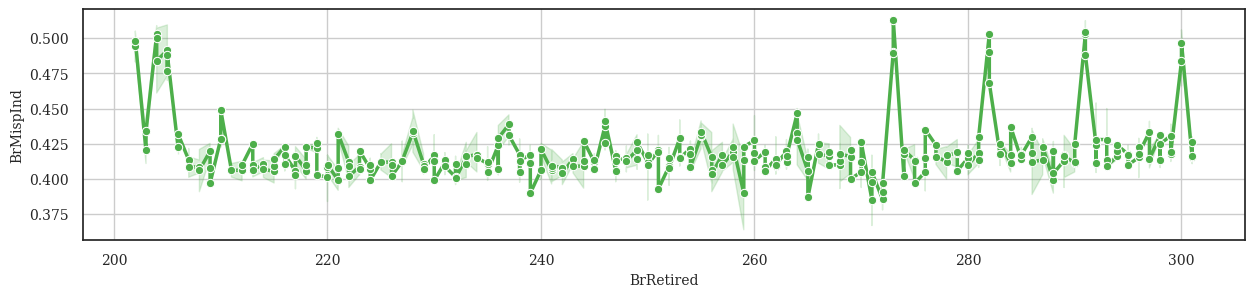

In [12]:

def set_style():
    plt.rcParams["font.family"] = "serif"
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    sns.set(rc={'figure.figsize':(15,3),"font.size":10, "font.family": "serif", 
                "axes.titlesize":10,"axes.labelsize": 10, "ytick.labelsize":10, 
                 "xtick.labelsize":10 , 'legend.fontsize':10, 'legend.title_fontsize': 10}, style="white")

set_style()

p = sns.lineplot(data=data, x="BrRetired", y="BrMispInd", marker="o", color=sns.color_palette("Set1")[2], linewidth=2.5, markersize = 6)
p.grid()
# p.set_xscale('log', base=2)
# p.set(xlim=(0,200))
# p.set(ylim=(0,15))

# Saving the Seaborn Figure:
# plt.savefig('res.pdf', bbox_inches='tight')